# Medidas de biodiversidad

Funciones para visualizar las medidas de biodiversidad de un experimento.

In [1]:
import numpy as np
import seaborn, math, os
from matplotlib import pyplot as plt
from copy import deepcopy

C:\Anaconda\envs\py34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
np.set_printoptions(precision=3)

In [3]:
%matplotlib notebook

In [4]:
% run medidas_biodiversidad.py

In [5]:
Manejos = {"b": 1.,
           "m": 7.,
           "i": 10.}

In [36]:
paisajes = np.load("paisajes_h2.npy")
poblaciones = np.load("./datos/exp_control_test.npy")

In [40]:
paisaje = paisajes[0].tolist() # intensificación 0%
poblacion = poblaciones[-1]

**¿Cuáles son las medidas de biodiversidad en cada paso del modelo?**

Biomasa paisaje:

In [8]:
biomasa = [None] * len(poblacion)
for i in range(len(poblacion)):
    biomasa[i] = riqueza_paisaje(poblacion, i)[0]   

Riqueza agrícola:

In [41]:
riqueza_milpa = [None] * len(poblacion)
biomasa_milpa = [None] * len(poblacion)

for i in range(len(poblacion)):
    riqueza_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min = 5)[1]   
    biomasa_milpa[i] = riqueza_agricola(poblacion, paisaje, i, biomasa_min = 5)[0]   

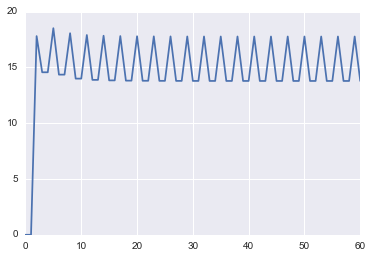

In [42]:
#%matplotlib notebook
fig = plt.figure()
plt.plot(range(len(riqueza_milpa)), biomasa_milpa)

#for i in range(len(riquezas_h15)):
#    plt.plot(i, riquezas_h15[i], color = "g", linestyle="-", marker="o", antialiased=True)

#for i in range(len(riquezas_h34)):
#    plt.plot(i, riquezas_h34[i], marker="o", ls="-", color = "blue")

#for i in range(len(riquezas_h50)):
#    plt.plot(i, riquezas_h50[i], marker=".", ls="-", color = "black")

#plt.plot(tiempo, riqueza_z, color="red")
#plt.ylim(ymin = 0, ymax=10)
#plt.xlim(xmin = -0.5, xmax = 8)
plt.show() 

### Medidas por celda

In [33]:
biomasa_celda = medidas_por_celda(poblacion, -2, biomasa_min = 5)[0]
riqueza_celda = medidas_por_celda(poblacion, -2, biomasa_min = 5)[1]

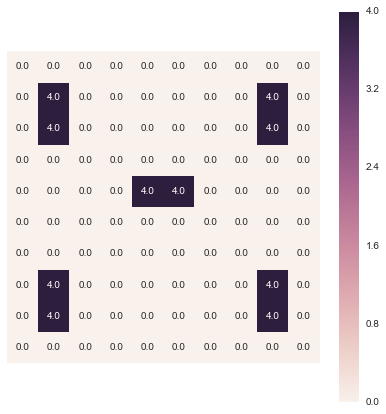

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
seaborn.heatmap(riqueza_celda, yticklabels=False,
               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 

#seaborn.heatmap(poblacion[-2, :, :, 1], yticklabels=False,
#               xticklabels=False, vmin = 0.0, annot=True, fmt=".1f", square=True) 
plt.show() 

### Paisaje

In [ ]:
def paisaje_numerico(paisaje, Manejos):
    """Convertir el paisaje a un arreglo numérico para graficar heatmap
    """
    paisaje_numerico = deepcopy(paisaje)
    for i in range(len(paisaje)):
            for j in range(len(paisaje[0])):
                paisaje_numerico[i][j] = Manejos[paisaje[i][j]]
    
    return np.array(paisaje_numerico)

paisaje1_num = paisaje_numerico(paisaje1, Manejos)

test = paisaje_numerico(paisajes_h15[6].tolist(), Manejos)

In [ ]:
seaborn.heatmap(paisaje_numerico(paisaje, Manejos), cmap = "summer", vmin = 1, square=True, vmax = 10)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# Original de numericalmooc, por Lorena Barba
from IPython.core.display import HTML
css_file = "C:/Users/hp\Desktop/proyectof/style2.css"
HTML(open(css_file, "r").read())